In [2]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
od.download("https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tevaughnshaw
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 5.53MB/s]

In [7]:
df = pd.read_csv("ushealthinsurancedataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
import numpy as np

In [15]:
33.000 / 100 #example to scale  bmi between 0 - 1 range

0.33

## Feature Engineering

In [16]:
# binary conversions for sex and smoker columns
df['sex'] = df['sex'].apply(lambda x: 1 if x=="female" else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [18]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=="yes" else 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [36]:
y= df.iloc[:, -1]
y = pd.DataFrame(y)
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [124]:
y = y.to_numpy()
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [125]:
y.shape

(1338, 1)

In [29]:
df2 = df.iloc[:, 0:6]
df2

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,southwest
1,18,0,33.770,1,0,southeast
2,28,0,33.000,3,0,southeast
3,33,0,22.705,0,0,northwest
4,32,0,28.880,0,0,northwest
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest
1334,18,1,31.920,0,0,northeast
1335,18,1,36.850,0,0,southeast
1336,21,1,25.800,0,0,southwest


In [30]:
x = pd.get_dummies(data=df2, columns=['children', 'region']) #one-hot encoding
x

,age,sex,bmi,smoker,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,1,1,0,0,0,0,0,0,0,0,1
1,18,0,33.770,0,0,1,0,0,0,0,0,0,1,0
2,28,0,33.000,0,0,0,0,1,0,0,0,0,1,0
3,33,0,22.705,0,1,0,0,0,0,0,0,1,0,0
4,32,0,28.880,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,0,0,0,0,1,0,0,0,1,0,0
1334,18,1,31.920,0,1,0,0,0,0,0,1,0,0,0
1335,18,1,36.850,0,1,0,0,0,0,0,0,0,1,0
1336,21,1,25.800,0,1,0,0,0,0,0,0,0,0,1


In [126]:
x = x.to_numpy()
x

array([[19.  ,  1.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  0.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  0.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  1.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

In [127]:
x.shape

(1338, 14)

In [128]:
x.dtype

dtype('float64')

## Scaling Features

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [140]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
#scale = StandardScaler()

Applying the "fit_transform" on training data, but "transform"(only) on testing/new data. Applies the same transformations to both sets of data, which creates consistent columns and prevents data leakage.

In [32]:
xtrain

,age,sex,bmi,smoker,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest
332,61,1,31.160,0,1,0,0,0,0,0,0,1,0,0
355,46,0,27.600,0,1,0,0,0,0,0,0,0,0,1
138,54,1,31.900,0,0,0,0,1,0,0,0,0,1,0
381,55,0,30.685,1,1,0,0,0,0,0,1,0,0,0
292,25,0,45.540,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,18,1,31.350,0,0,0,0,0,1,0,1,0,0,0
1130,39,1,23.870,0,0,0,0,0,0,1,0,0,1,0
1294,58,0,25.175,0,1,0,0,0,0,0,1,0,0,0
860,37,1,47.600,1,0,0,1,0,0,0,0,0,0,1


In [130]:
xtrain # numpy type

array([[61.   ,  1.   , 31.16 , ...,  1.   ,  0.   ,  0.   ],
       [46.   ,  0.   , 27.6  , ...,  0.   ,  0.   ,  1.   ],
       [54.   ,  1.   , 31.9  , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   ,  0.   , 25.175, ...,  0.   ,  0.   ,  0.   ],
       [37.   ,  1.   , 47.6  , ...,  0.   ,  0.   ,  1.   ],
       [55.   ,  0.   , 29.9  , ...,  0.   ,  0.   ,  1.   ]])

In [38]:
ytrain

,charges
332,13429.03540
355,24603.04837
138,27322.73386
381,42303.69215
292,42112.23560
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [131]:
ytrain #numpy type

array([[13429.0354 ],
       [24603.04837],
       [27322.73386],
       [42303.69215],
       [42112.2356 ],
       [41676.0811 ],
       [ 4562.8421 ],
       [ 3490.5491 ],
       [12485.8009 ],
       [ 6748.5912 ],
       [45863.205  ],
       [ 2166.732  ],
       [ 6457.8434 ],
       [12094.478  ],
       [19515.5416 ],
       [ 4915.05985],
       [ 2523.1695 ],
       [11566.30055],
       [23241.47453],
       [ 4074.4537 ],
       [ 6600.20595],
       [ 1242.816  ],
       [19361.9988 ],
       [ 8603.8234 ],
       [ 5972.378  ],
       [ 3171.6149 ],
       [ 5375.038  ],
       [12629.1656 ],
       [19040.876  ],
       [ 8219.2039 ],
       [ 7348.142  ],
       [ 4347.02335],
       [ 6753.038  ],
       [ 2457.502  ],
       [ 5976.8311 ],
       [18806.14547],
       [11070.535  ],
       [10065.413  ],
       [24671.66334],
       [ 1824.2854 ],
       [ 7325.0482 ],
       [40103.89   ],
       [39725.51805],
       [ 1748.774  ],
       [48173.361  ],
       [35

## Model Creation

In [57]:
import seaborn as sb

In [182]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [66]:
folds = KFold(n_splits=5)

In [141]:
cross_val_score(RandomForestRegressor(), xtest, ytest.ravel(), cv=folds)

array([0.8493916 , 0.84888594, 0.88656047, 0.85052241, 0.79901318])

In [185]:
cross_val_score(SVR(), xtest, ytest.ravel(), cv=folds)

array([-0.07995977, -0.14636686, -0.07105705, -0.15226263, -0.0671298 ])

In [171]:
rfr = RandomForestRegressor(max_depth=7)

In [172]:
rfr.fit(xtrain, ytrain.ravel())

RandomForestRegressor(max_depth=7)

In [173]:
rfr.predict(xtest[1].reshape(1,-1))

array([5308.01327419])

In [174]:
rfr.score(xtest, ytest)

0.8661768096963084

# Visualizing Tree

In [78]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [175]:
# Check depth of tree
rfr.estimators_[0].tree_.max_depth

7

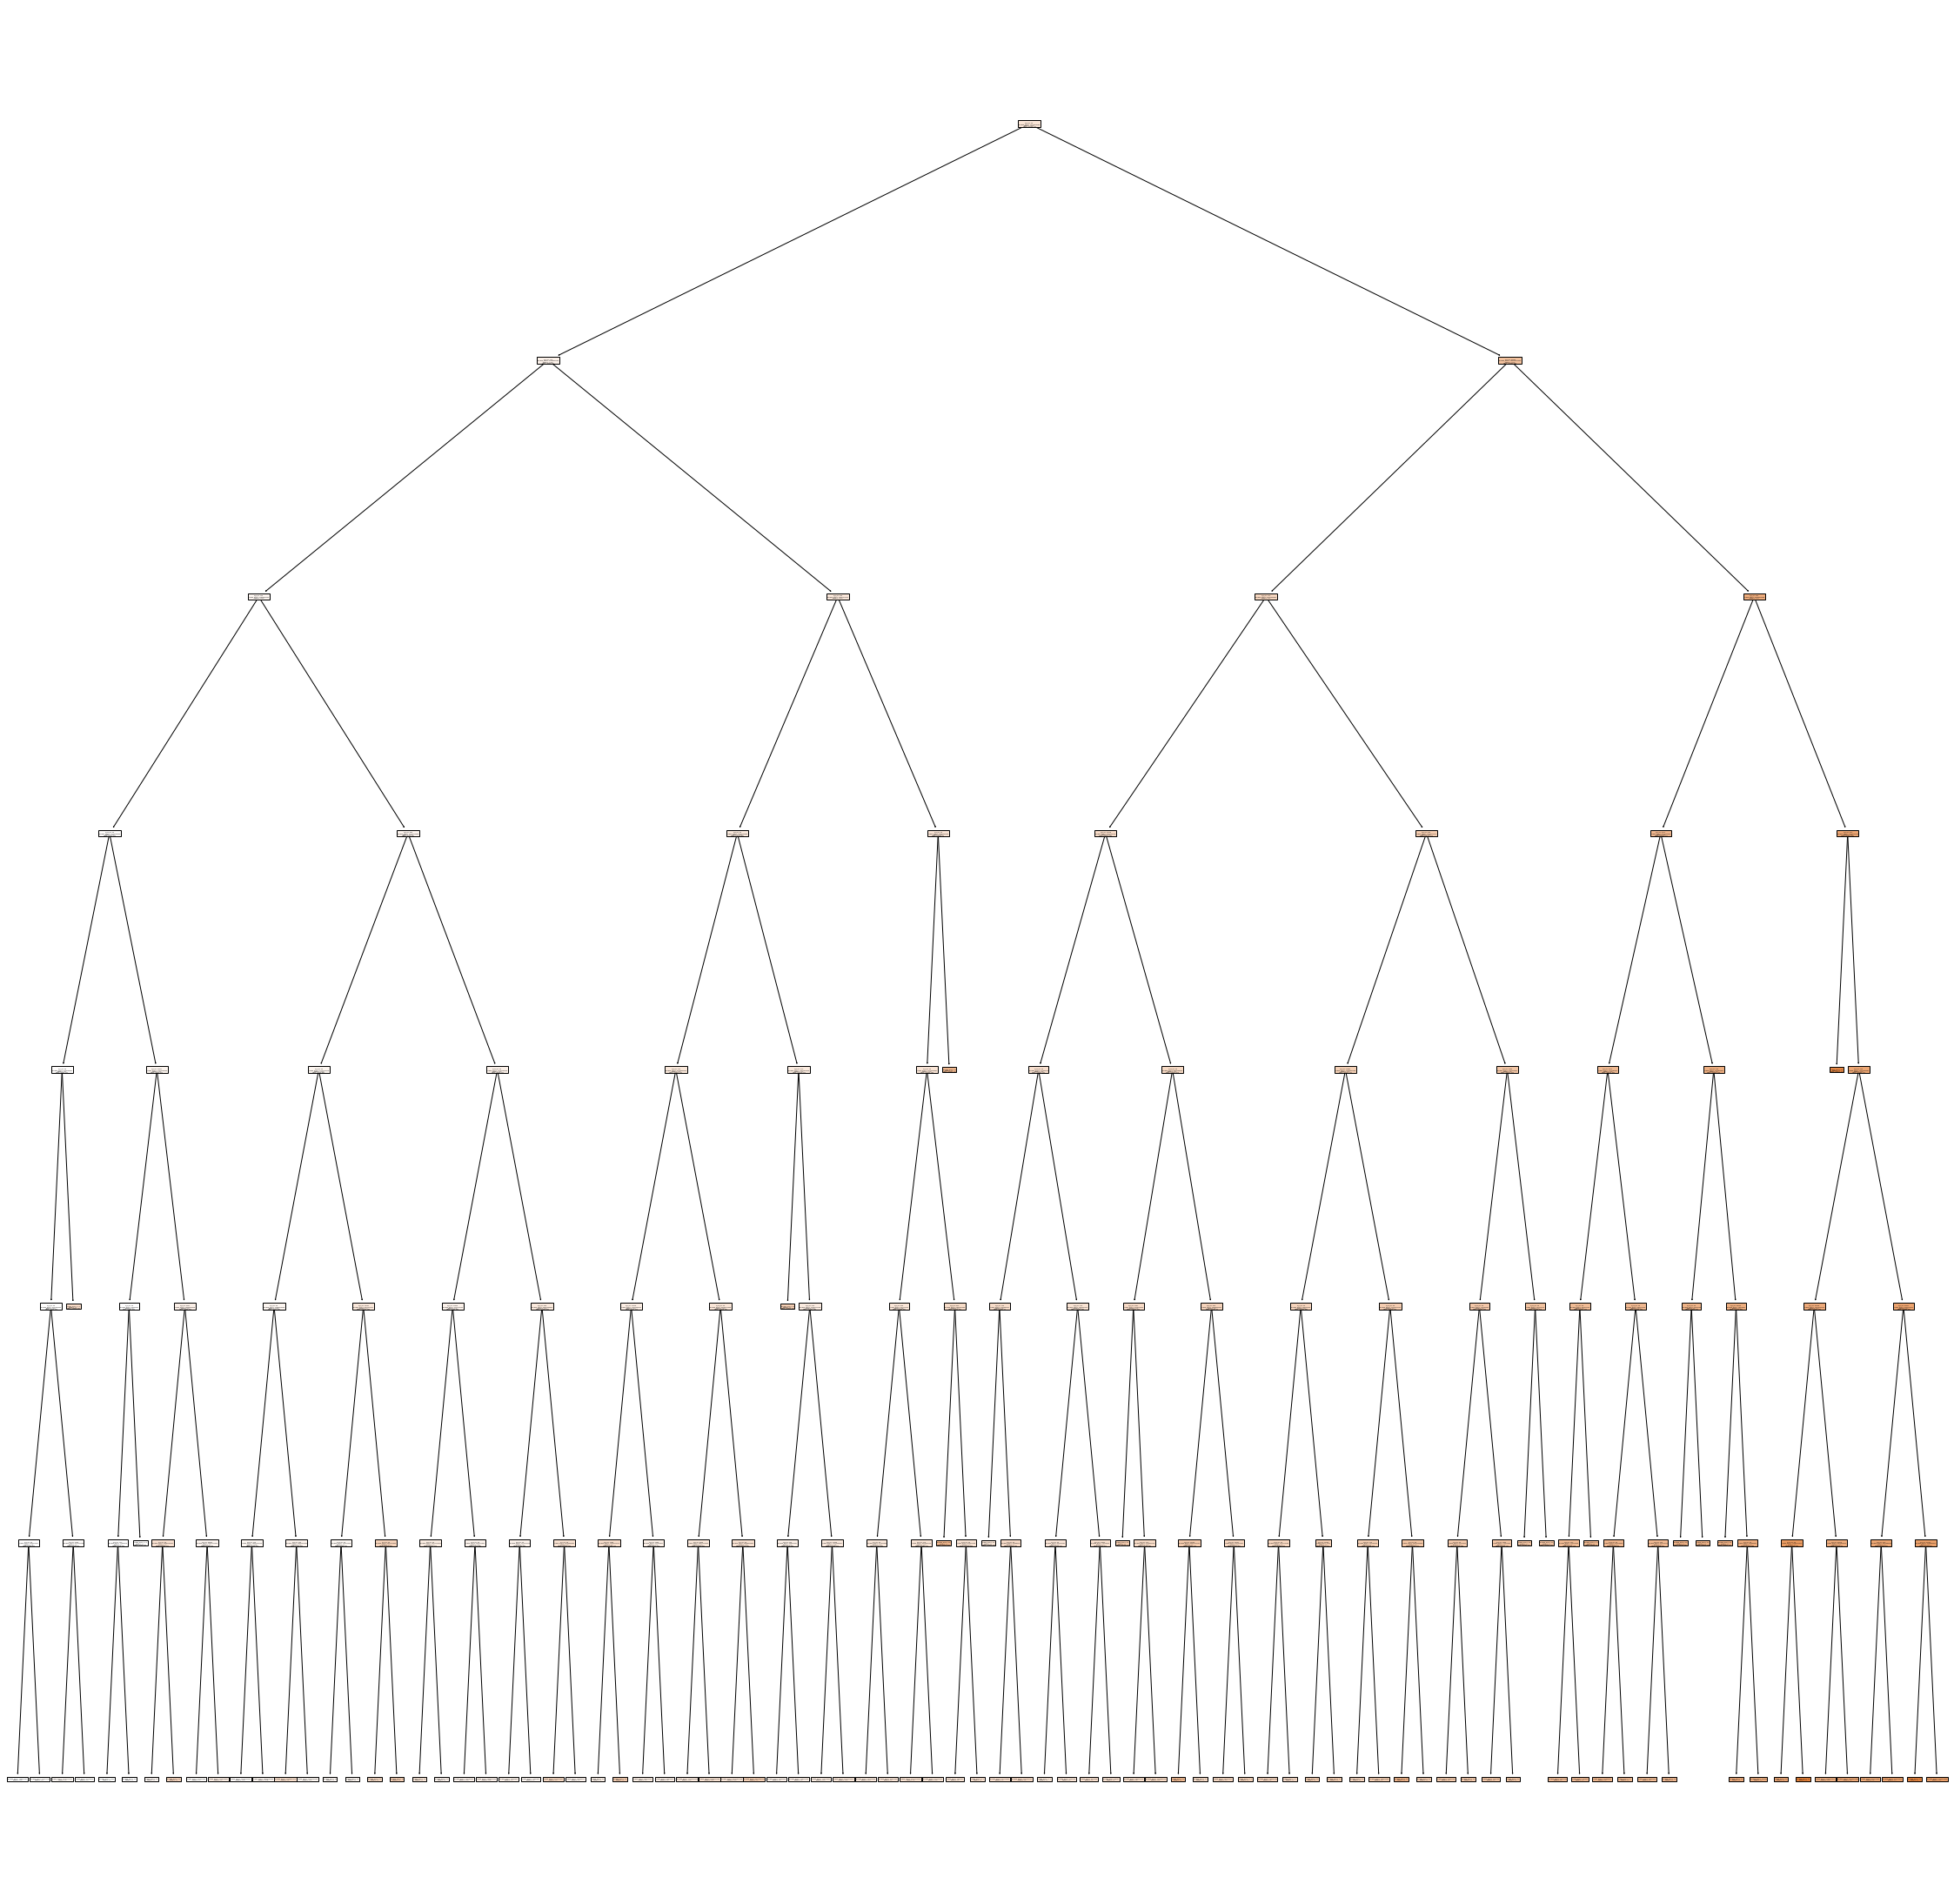

In [176]:
# Plotting first decision tree
plt.figure(figsize=(40,40))
_=tree.plot_tree(rfr.estimators_[0], feature_names=x.dtype.names, filled=True)

## Saving the Model

In [120]:
import pickle

In [177]:
pickle.dump(rfr, open('regmodel.pkl', 'wb'))

In [178]:
# load final model
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [179]:
# prediction
pickle_model.predict(xtest[1].reshape(1,-1)) # 86 percent accuracy

array([5308.01327419])